In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

In [ ]:
# Find out your current working directory
import os
print(os.getcwd())

# Out: /Users/shane/Documents/blog

# Display all of the files found in your current working directory
print(os.listdir(os.getcwd()))

In [2]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


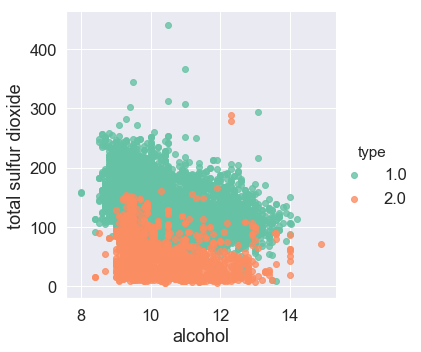

In [12]:
#plotting two features
#sns.lmplot ('fixed acidity', 'residual sugar', data = wine, hue = 'type', palette = 'Set1', fit_reg = False )
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [ ]:
#Specify inputs for the model
#properties = np.asmatrix(wine)
#wine = np.where(wine[:1]=='white', 0, 1) #converting red and white strings to integers
#wine = wine.tolist()
#wine
#Feature names
#wine_features = wine.columns.values[1:].tolist()
#wine_features, properties

In [3]:
#X = wine.drop('type', axis = 1)
#X = wine.drop('volatile acidity',axis = 1)
#X = X.drop('citric acid',axis = 1)
#X = X.drop('chlorides',axis = 1)
#X = X.drop('density',axis =1 )
#X = X.drop('sulphates',axis = 1)
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#X = X.fillna(0).astype(int)
#X = pd.DataFrame(data = X,dtype = int)
#X = np.where(X.values >= np.finfo(np.float64).max)
#X = int(round(X))
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)
#y = y.fillna(0).astype(int)
#y = np.where(y.values >= np.finfo(np.float64).max)
#y = int(round(y))
X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0      1.0            7.0             0.270         0.36           20.70   
 1      1.0            6.3             0.300         0.34            1.60   
 2      1.0            8.1             0.280         0.40            6.90   
 3      1.0            7.2             0.230         0.32            8.50   
 4      1.0            7.2             0.230         0.32            8.50   
 5      1.0            8.1             0.280         0.40            6.90   
 6      1.0            6.2             0.320         0.16            7.00   
 7      1.0            7.0             0.270         0.36           20.70   
 8      1.0            6.3             0.300         0.34            1.60   
 9      1.0            8.1             0.220         0.43            1.50   
 10     1.0            8.1             0.270         0.41            1.45   
 11     1.0            8.6             0.230         0.40            4.20   

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit(y)
y = le.transform(y)
print(y)

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)

#np.sum(X)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#X,y

(4330, 12)
(2134, 12)
(4330,)
(2134,)


In [ ]:
np.any(np.isnan(X))
np.all(np.isfinite(X))

In [ ]:
np.any(np.isnan(y))
np.all(np.isfinite(y))

In [5]:
#fitting the model
model = svm.SVR(kernel='rbf')
model.fit(X_train, y_train)


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[6.08671248 5.92499934 5.08103293 ... 5.5323234  6.00080078 6.18329102]
1524    6.0
5682    6.0
2736    6.0
741     6.0
6415    5.0
1291    6.0
3252    5.0
108     5.0
1643    6.0
5259    6.0
3862    6.0
1875    7.0
578     7.0
4840    6.0
5975    6.0
6444    6.0
349     6.0
1953    6.0
2430    5.0
551     5.0
3013    6.0
5147    6.0
3612    7.0
1290    6.0
2905    8.0
5272    6.0
5947    6.0
2910    5.0
5894    6.0
5200    5.0
       ... 
1432    6.0
4189    5.0
6366    6.0
3631    8.0
4073    6.0
2991    6.0
169     4.0
6409    6.0
3209    6.0
5828    6.0
814     8.0
1252    7.0
3791    6.0
4949    5.0
2747    6.0
5149    8.0
3221    6.0
6321    7.0
914     5.0
1722    5.0
4939    5.0
3525    6.0
4530    5.0
4694    5.0
34      5.0
2385    4.0
5058    5.0
4933    7.0
2863    5.0
1054    5.0
Name: quality, Length: 2134, dtype: float64


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(rms)
print(mae)

0.7383186036927494
0.5475219349331265


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

In [ ]:
# Plot the hyperplane
sns.lmplot('alcohol', 'total sulfur dioxide', data=wine, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');